In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import numpy as np

PATH_TO_ROOT = '../'
sys.path.insert(0, os.path.join(PATH_TO_ROOT, 'code', 'src'))
import utils, visualizations, analysis


In [ ]:
analysis_dir = os.path.join(PATH_TO_ROOT, 'analysis')

# Paths from dependent variables
categories_path = os.path.join(PATH_TO_ROOT, 'data', 'files', 'category_groupings.json')
factor_categories_path = os.path.join(analysis_dir, 'mental_capacities', 'factor_analysis', 'results', 'fa_groupings.json')
items_path = os.path.join(PATH_TO_ROOT, 'data', 'files', 'mental_capacity_items.txt')

# Labels and colors for graphs
conditions = ["NoVideo", "Machines", "Tools", "Companions"]
condition_color_idxs = [7, 1, 2, 4]
save_ext = 'pdf'

# Analysis dirs
categorization_source = 'body-heart-mind'
# R Results from 40-item survey using body-heart-mind, factor analysis, and item level
R_results_save_dir = os.path.join(analysis_dir, 'mental_capacities', categorization_source, 'R', 'results')
factor_analysis_results_save_dir = os.path.join(analysis_dir, 'mental_capacities', 'factor_analysis', 'results')
factor_R_results_save_dir = os.path.join(factor_analysis_results_save_dir, 'R', 'results')

item_level_R_results_save_dir = os.path.join(analysis_dir, 'mental_capacities', 'item_level')

# Attitudes results
attitudes_R_results_save_dir = os.path.join(analysis_dir, 'attitudes', 'R', 'results')

# Save figure directories
fig_save_dir = os.path.join(analysis_dir, 'figures')
utils.ensure_dir(fig_save_dir)

log_path = os.path.join(fig_save_dir, 'log.txt')
utils.informal_log("Analysis dir: {}".format(analysis_dir), log_path)
utils.informal_log("Fig dir: {}".format(fig_save_dir), log_path)

../analysis/mental_capacities/factor_analysis/results
[0625_101735] Analysis dir: ../analysis
[0625_101735] Fig dir: ../analysis/figures


## 4A: Body-Heart-Mind Categories Figures

Mainly used in CHI-Late Breaking Work and CogSci papers

### Graph ratings overall and using body-heart-mind categories

Saved file to ../analysis/figures/body-heart-mind/mca_overall_category/body-heart-mind.csv
[0625_100801] Saving graph to ../analysis/figures/body-heart-mind/mca_overall_category/overall-_body-heart-mind.pdf


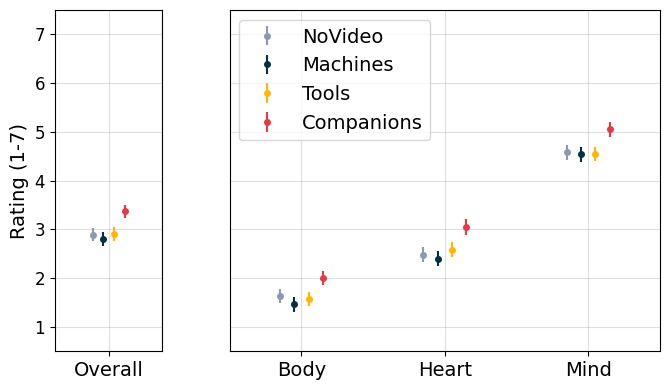

Error bars represent 95% Confidence Intervals


In [3]:
overall_category_save_dir = os.path.join(fig_save_dir, 'body-heart-mind', 'mca_overall_category')
utils.ensure_dir(overall_category_save_dir)

orientation = 'vertical'
marker_size = 4
save = True
font_size_dict = {
    'ylabel': 14,
    'legend': 14,
    'xticklabel': 14,
    'yticklabel': 12
}

R_results_path = os.path.join(R_results_save_dir, '{}_results.txt'.format(categorization_source))

categorization = utils.read_file(categories_path)[categorization_source]

if not os.path.exists(R_results_path):
    raise ValueError("Path to R results file {} does not exist".format(R_results_path))

# Create fig with multiple subplots
fig, axes = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [1, 4]}, figsize=(6.8, 4))

# Right plot is means by category
fig, axes[1] = analysis.category_level_pointplot(
    r_results_path=R_results_path,
    grouping_source=categorization_source,
    groups=categorization.keys(),
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    marker_size=marker_size,
    show_xlabels=False,
    show_ylabels=False,
    label=True,
    show_legend=True,
    title=None,
    fig=fig,
    ax=axes[1],
    font_size_dict=font_size_dict,
    show=False,
    save_path=None)

# Left plot should be the overall means
fig, axes[0] = analysis.overall_pointplot(
    r_results_path=R_results_path,
    grouping_source=categorization_source,
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    marker_size=marker_size,
    spacing_multiplier=0.2,
    label=True,
    show_xlabel=False,
    show_ylabel=True,
    show_legend=False,
    title=None,
    fig=fig,
    ax=axes[0],
    font_size_dict=font_size_dict,
    save_path=None,
    show=False)

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)
if save:
    fig_save_path = os.path.join(
        overall_category_save_dir,
        'overall-_{}.{}'.format(categorization_source, save_ext))
    utils.informal_log("Saving graph to {}".format(fig_save_path))
    plt.savefig(fig_save_path, bbox_inches="tight")
plt.show()
print("Error bars represent 95% Confidence Intervals")



### Graph Item Level Point Plots separated by body-heart-mind categories

../analysis/mental_capacities/item_level/results.txt
1267
Saved file to ../analysis/figures/body-heart-mind/item_level/item_means.csv
[0625_105336] Saving graph to ../analysis/figures/body-heart-mind/item_level/item_level_graph.pdf


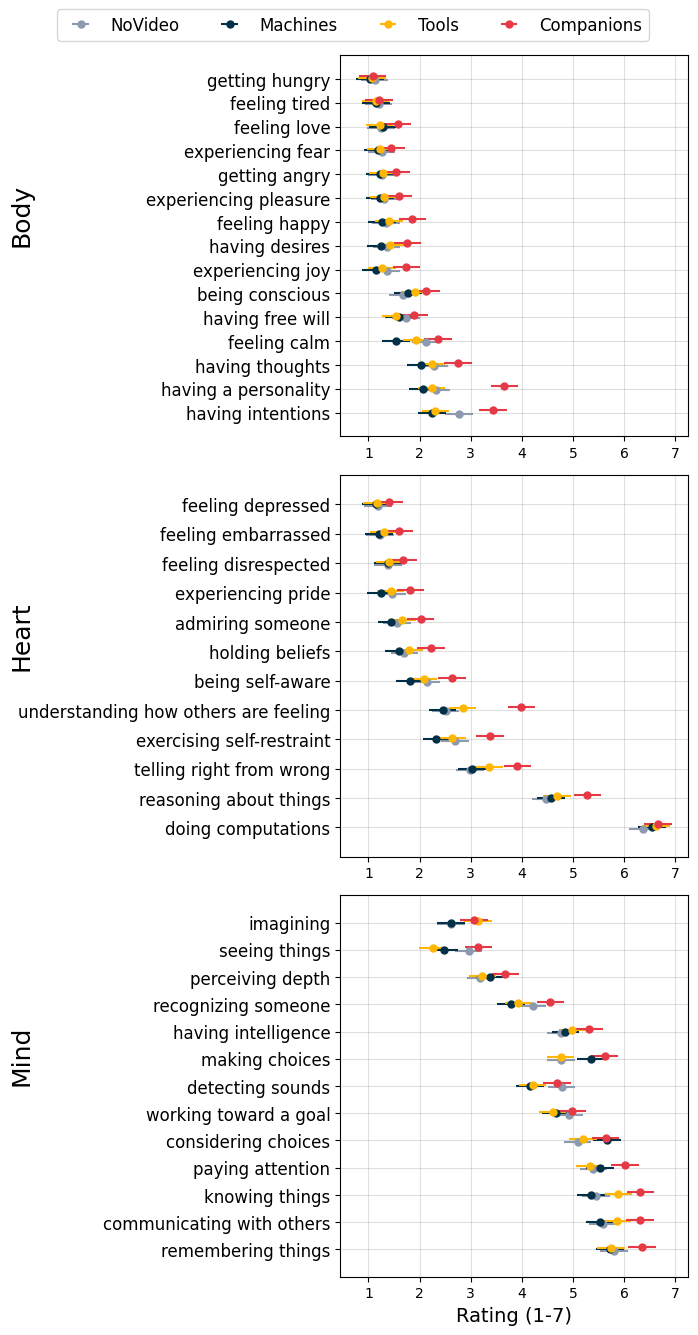

In [49]:
item_level_save_dir = os.path.join(fig_save_dir, 'body-heart-mind', 'item_level')
utils.ensure_dir(item_level_save_dir)
save = True

item_level_R_results_path = os.path.join(item_level_R_results_save_dir, 'results.txt')

# Read items and make R compatible
items = utils.read_file(items_path)
items = [item.replace(' ', '.') for item in items]


# Get ready to sort DF by group
categorization = utils.read_file(categories_path)[categorization_source]

# Create dictionary mapping item to its group
item_group_dict = {}
for k, vals in categorization.items():
    for val in vals:
        item_group_dict[val] = k

# Read item level emmeans
graph_data, df = analysis.read_emmeans_marginalized_result(
    results_path=item_level_R_results_path,
    grouping_source="item_level",
    marginalized_var='item',
    marginalized_var_values=items,
    save_dir=item_level_save_dir,
    overwrite=False
)

pivot_df = analysis._format_and_pivot_emmeans_df(
    emmeans_df=df,
    target_column='item'
)

pivot_df['category'] = pivot_df['item'].apply(lambda x : item_group_dict[x])

categories = categorization.keys()

# Parameters for plotting
font_size_dict = {
    'xlabel': 14,
    'ylabel': 18,
    'legend': 12,
    'title': 14,
    'xticklabel': 10,
    'yticklabel': 12
}
fig, axes = plt.subplots(3, 1, sharex=True, figsize=(7, 13))

for idx, category in enumerate(categories):
    category_df = pivot_df[pivot_df['category'] == category]
    category_df = category_df.sort_values(by=['mean-NoVideo'], ascending=False)

    # Extract means and 95% CI errors
    means = category_df[["mean-{}".format(condition) for condition in conditions]].to_numpy().T
    errors = category_df[["ci_error-{}".format(condition) for condition in conditions]].to_numpy().T

    ylim = (-1, len(category_df))
    ytick_labels_list = category_df['item'].to_list()

    fig, axes[idx] = visualizations.pointplot(
        fig=fig,
        ax=axes[idx],
        means=means,
        errors=errors,
        orientation='horizontal',
        labels=conditions if idx == 0 else None,
        show_legend=False,
        ytick_labels=ytick_labels_list,
        xtick_labels=[i for i in range(1, 8)],
        xlabel='Rating (1-7)' if idx == len(categories) - 1 else "",
        ylabel=category.capitalize(),
        ylim=ylim,
        show_grid=True,
        alpha=1.0,
        marker_size=5,
        color_idxs=condition_color_idxs,
        font_size_dict=font_size_dict,
    )

    # Align y-axis label to be the same
    label_x_pos = -0.88
    axes[idx].yaxis.set_label_coords(label_x_pos, 0.58)

    # enable xticks
    axes[idx].tick_params(labelbottom=True)


# Add legend to top
fig.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, 1.03),
    ncol=4,
    fontsize=font_size_dict['legend'] if 'legend' in font_size_dict else None)

if save:
    save_path = os.path.join(item_level_save_dir, 'item_level_graph.{}'.format(save_ext))
    utils.informal_log("Saving graph to {}".format(save_path))
    plt.savefig(save_path, bbox_inches="tight")
plt.show()



## Factor Loading Categories

### Graph ratings overall and using factor loading categories

../analysis/mental_capacities/factor_analysis/results/R/results/3_components_results.txt
286
Saved file to ../analysis/figures/factor-loading/overall_category/factor_analysis.csv
[0625_105313] Saving graph to ../analysis/figures/factor-loading/overall_category/overall_factor_loading.pdf


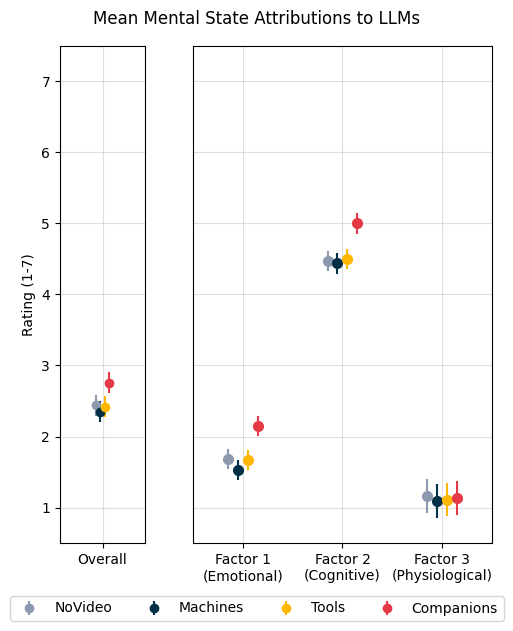

In [48]:
overall_category_save_dir = os.path.join(fig_save_dir, 'factor-loading', 'overall_category')
utils.ensure_dir(overall_category_save_dir)

orientation = 'vertical'
n_factors = 3

# Get path to data
r_results_path = os.path.join(factor_R_results_save_dir, '{}_components_results.txt'.format(n_factors))
if not os.path.exists(r_results_path):
    raise ValueError("Path to R results file {} does not exist".format(r_results_path))
grouping_source = 'factor_analysis'
groups = ['Factor{}'.format(i + 1) for i in range(n_factors)]


# Create fig with multiple subplots
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(5,6), gridspec_kw={'width_ratios': [1, 3.5]})

# Right plot is means by category
fig, axes[1] = analysis.category_level_pointplot(
    r_results_path=r_results_path,
    grouping_source=grouping_source,
    groups=groups,
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    show_xlabels=False,
    show_ylabels=False,
    label=False,
    marker_size=7,
    show_legend=False,
    title=None,
    fig=fig,
    ax=axes[1],
    show=False,
    save_path=None)

# Re-label X-tick labels
axes[1].set_xticklabels(['Factor 1\n(Emotional)', 'Factor 2\n(Cognitive)', 'Factor 3\n(Physiological)'])
# Left plot should be the overall means
fig, axes[0] = analysis.overall_pointplot(
    r_results_path=r_results_path,
    grouping_source=grouping_source,
    conditions=conditions,
    emmeans_graph_save_dir=overall_category_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation=orientation,
    label=True,
    show_legend=False,
    show_xlabel=False,
    title=None,
    fig=fig,
    ax=axes[0],
    save_path=None,
    show=False)

fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
fig.suptitle('Mean Mental State Attributions to LLMs')

plt.tight_layout()
plt.subplots_adjust(wspace=0.25)


save_path = os.path.join( overall_category_save_dir, 'overall_factor_loading.{}'.format(save_ext))

utils.informal_log("Saving graph to {}".format(save_path))
plt.savefig(save_path, bbox_inches="tight")
plt.show()



### Graph Overall and the item level, separated by factor groupings

Note that final version underwent preprocessing using Adobe Illustrator

Saved file to ../analysis/figures/factor-loading/item_level/item_means.csv


/n/fs/scratch/ac4802/tmp/ipykernel_2567755/3006269788.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['mean-Average'] = category_df[['mean-{}'.format(condition) for condition in conditions]].mean(axis=1)
/n/fs/scratch/ac4802/tmp/ipykernel_2567755/3006269788.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_df['mean-Average'] = category_df[['mean-{}'.format(condition) for condition in conditions]].mean(axis=1)
/n/fs/scratch/ac4802/tmp/ipykernel_2567755/3006269788.py:125: Settin

[0625_102136] Saving graph to ../analysis/figures/factor-loading/item_level/factor_analysis_item_level_graph.pdf


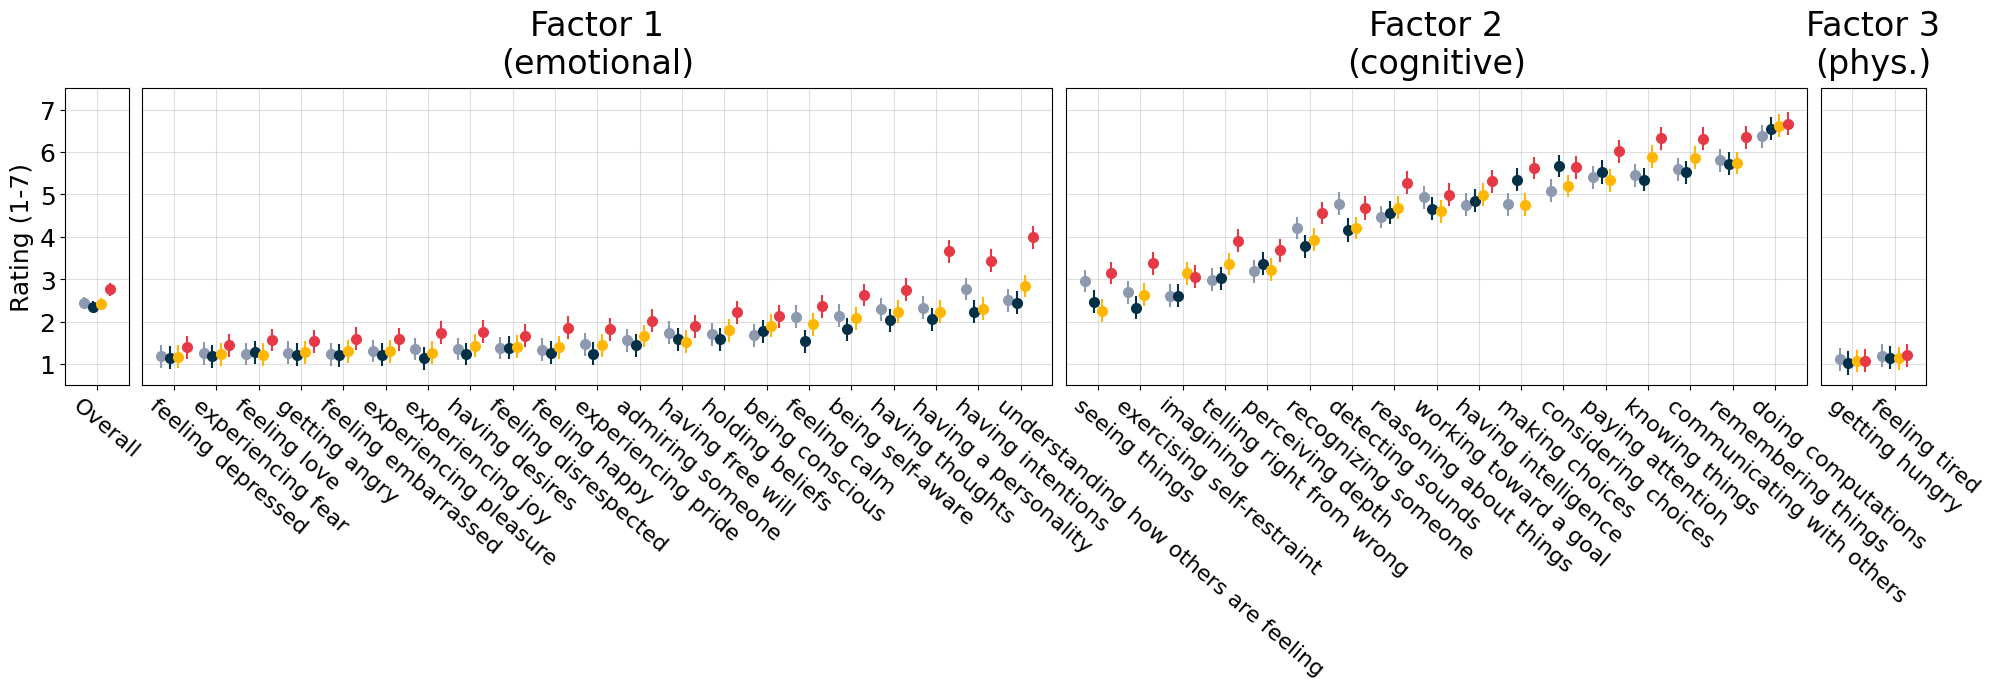

In [ ]:
item_level_save_dir = os.path.join(fig_save_dir, 'factor-loading', 'item_level')
utils.ensure_dir(item_level_save_dir)

item_level_R_results_path = os.path.join(item_level_R_results_save_dir, 'results.txt')
fa_groupings_path = os.path.join(factor_analysis_results_save_dir, 'fa_groupings.json')
grouping_source = 'factor_analysis'
n_factors = 3

# Parameters
order_key = 'factors' # select from: ['ascending', 'descending', 'factors']
save = True
show_legend = False
mark_mentioned = False
sort_by = 'average' # select from: ['baseline', 'companions', 'average']

# Read items and make R compatible
items = utils.read_file(items_path)
items = [item.replace(' ', '.') for item in items]


# Get ready to sort DF by group
groupings = utils.read_file(fa_groupings_path)
grouping = groupings[grouping_source]
item_group_dict = {}
for k, vals in grouping.items():
    for val in vals:
        item_group_dict[val] = k

graph_data, df = analysis.read_emmeans_marginalized_result(
    results_path=item_level_R_results_path,
    grouping_source="item_level",
    marginalized_var='item',
    marginalized_var_values=items,
    save_dir=item_level_save_dir,
    overwrite=True
)

save_path = os.path.join(
    item_level_save_dir,
    'factor_analysis_item_level_graph.{}'.format(save_ext))

pivot_df = analysis._format_and_pivot_emmeans_df(
    emmeans_df=df,
    target_column='item'
)
# Separate items based on factor loadings and get order or categories for plot
pivot_df['category'] = pivot_df['item'].apply(lambda x : item_group_dict[x])
categories  = list(grouping.keys())
label_categories = ['Factor 1\n(emotional)', 'Factor 2\n(cognitive)', 'Factor 3\n(phys.)']
order_dict = {
    'ascending': [2, 0, 1], # Ascending: Phys, Emo, Cog
    'descending': [1, 0, 2], # Descending: Cog, Emo, Phys
    'factors': [0, 1, 2] # By factors
}
assert order_key in order_dict
order = order_dict[order_key]
categories = [categories[idx] for idx in order]
label_categories = [label_categories[idx] for idx in order]

# Styling parameters
buffer = 0.75
n_items_per_group = [len(grouping[key]) - 1 + 2 * buffer for key in categories]
n_items_per_group = [1 - 1 + 2 * buffer] + n_items_per_group
font_size_dict = {
    'xlabel': 24,
    'ylabel': 18,
    'legend': 20,
    'title': 18,
    'xticklabel': 16,
    'yticklabel': 18
}
marker_size = 7
spacing_multiplier = 0.2
xtick_rotation = -40

# Add * for items that were mentioned
mentioned_items = set([
    "communicating with others",
    "having a personality",
    "knowing things",
    "having intelligence",
    "understanding how others are feeling"
])

fig, axes = plt.subplots(1, 4,
                         sharey=True,
                         figsize=(20, 7),
                         gridspec_kw={'width_ratios': n_items_per_group})
legend_labels = ['No Video', 'Machines', 'Tools', 'Companions']


# Overall plot
r_results_path = os.path.join(factor_R_results_save_dir, '{}_components_results.txt'.format(n_factors))
fig, axes[0] = analysis.overall_pointplot(
    r_results_path=r_results_path,
    grouping_source='factor_analysis',
    conditions=conditions,
    label=False,
    emmeans_graph_save_dir=item_level_save_dir,
    condition_color_idxs=condition_color_idxs,
    orientation='vertical',
    show_xlabel=False,
    show_legend=False,
    xlim=(-buffer, buffer),
    save_path=None,
    font_size_dict=font_size_dict,
    marker_size=marker_size,
    spacing_multiplier=spacing_multiplier,
    fig=fig,
    ax=axes[0]
)

for label in axes[0].get_xticklabels():
    label.set_rotation(xtick_rotation)  # Rotate labels
    label.set_horizontalalignment('left')  # Align to the right
    label.set_transform(label.get_transform() + transforms.ScaledTranslation(-20 / 72, 0, fig.dpi_scale_trans))
# Item level plots
for idx, category in enumerate(categories):
    category_df = pivot_df[pivot_df['category'] == category]
    if sort_by == 'baseline':
        category_df = category_df.sort_values(by=['mean-NoVideo'], ascending=True)
    elif sort_by == 'companions':
        category_df = category_df.sort_values(by=['mean-Companions'], ascending=True)
    elif sort_by == 'average':
        category_df['mean-Average'] = category_df[['mean-{}'.format(condition) for condition in conditions]].mean(axis=1)
        category_df = category_df.sort_values(by=['mean-Average'], ascending=True)

    means = category_df[["mean-{}".format(condition) for condition in conditions]].to_numpy().T
    errors = category_df[["ci_error-{}".format(condition) for condition in conditions]].to_numpy().T

    xlim = (-buffer, len(category_df) - 1 + buffer)
    xtick_labels_list = category_df['item'].to_list()
    # Mark items that were mentioned
    if mark_mentioned:
        xtick_labels_list = ["*" + item if item in mentioned_items else item for item in xtick_labels_list]


    if order_key == 'descending': # Flip order of means, errors, and xtick_labels_list
        means = np.flip(means, axis=1)
        errors = np.flip(errors, axis=1)
        xtick_labels_list = xtick_labels_list[::-1]

    fig, axes[idx + 1] = visualizations.pointplot(
        fig=fig,
        ax=axes[idx + 1],
        means=means,
        errors=errors,
        orientation='vertical',
        labels=legend_labels if idx + 1 == 1 else None,
        show_legend=False, #True if idx == 0 else False,
        legend_loc='upper left',
        xtick_labels=xtick_labels_list,
        # xtick_label_rotation=40,
        ytick_labels=[i for i in range(1, 8)],
        yticks=[i for i in range(1, 8)],
        ylim=(0.5, 7.5),
        ylabel='Rating' if idx + 1 == 0 else "",
        xlabel=label_categories[idx],
        xlim=xlim,
        show_grid=True,
        alpha=1.0,
        marker_size=marker_size,
        spacing_multiplier=spacing_multiplier,
        color_idxs=condition_color_idxs,
        font_size_dict=font_size_dict,
    )
    for label in axes[idx + 1].get_xticklabels():
        label.set_rotation(xtick_rotation)  # Rotate labels
        label.set_horizontalalignment('left')  # Align to the right
        label.set_transform(label.get_transform() + transforms.ScaledTranslation(-20 / 72, 0, fig.dpi_scale_trans))

    # Align x-axis label to be the same
    axes[idx + 1].xaxis.set_label_position('top')
    axes[idx + 1].xaxis.set_label_coords(0.5, 1.05)

    # Remove y-axis ticks from center and right plots
    if idx + 1 > 0: # and idx + 1 < 3:
        axes[idx + 1].tick_params(axis='y', left=False)
    # elif idx + 1 == 3:
    #     axes[idx + 1].yaxis.tick_right()
    #     axes[idx + 1].tick_params(axis='y', labelright=True, labelleft=False)  # Show labels on right, hide on left


plt.subplots_adjust(wspace=0.03)

if show_legend:
    legend_handles, legend_labels = axes[1].get_legend_handles_labels()
    legend_order = [3, 2, 1, 0]

    fig.legend([legend_handles[i] for i in legend_order],
            [legend_labels[i] for i in legend_order],
            loc='lower right', bbox_to_anchor=(0.95, 0.01), ncol=1, fontsize=font_size_dict['legend'])

if save:

    utils.informal_log("Saving graph to {}".format(save_path))
    plt.savefig(save_path, bbox_inches="tight")

## Plot attitudes

Note: in Cogsci version, we only reported anthropomorphism

[0503_154707] Saving graph to ../analysis/figures/attitudes/attitudes_graph.pdf


<Figure size 640x480 with 0 Axes>

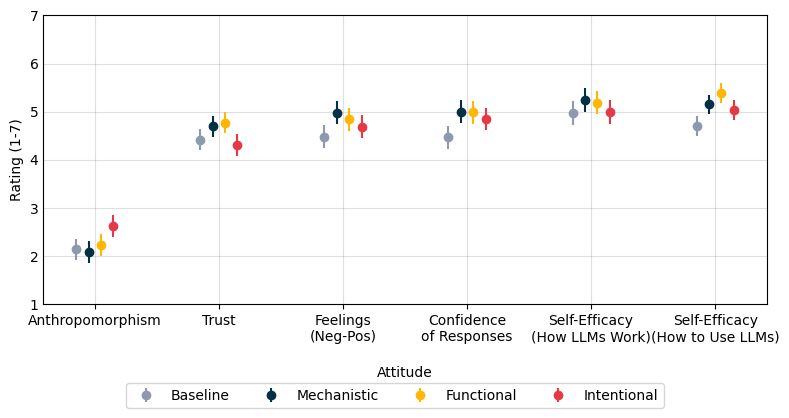

In [7]:
attitudes_save_dir = os.path.join(fig_save_dir, 'attitudes')
utils.ensure_dir(attitudes_save_dir)

attitude_labels = {
    'humanness': 'Anthropomorphism',
    'trust': 'Trust',
    'feeling': 'Feelings\n(Neg-Pos)',
    'confidence': 'Confidence\nof Responses',
    'se_how': 'Self-Efficacy\n(How LLMs Work)\n ',
    'se_use': 'Self-Efficacy\n(How to Use LLMs)'
}

attitudes = attitude_labels.keys()

means = []
errors = []

for attitude in attitudes:
    results_path = os.path.join(attitudes_R_results_save_dir, '{}_results.txt'.format(attitude))

    graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=results_path,
        grouping_source=attitude,
        variable_name='portrayal'
    )

    attitude_means = list(np.array(graph_data['means']).squeeze())
    attitude_errors = list(np.array(graph_data['errors']).squeeze())
    means.append(attitude_means)
    errors.append(attitude_errors)

means = np.array(means).T
errors = np.array(errors).T
fig, ax = visualizations.pointplot(
    means=means,
    errors=errors,
    color_idxs=condition_color_idxs,
    labels=conditions,
    show_legend=False,
    orientation='vertical',
    xlabel='Attitude',
    xtick_labels=[attitude_labels[attitude] for attitude in attitudes],
    ylim=[1, 7],
    ylabel='Rating (1-7)',
    show_grid=True,
    fig_size=(8, 4),
    show=False
)
# Add Legend outside of plot
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)
plt.tight_layout()

save_path = os.path.join(attitudes_save_dir, 'attitudes_graph.{}'.format(save_ext))
utils.informal_log("Saving graph to {}".format(save_path))

plt.savefig(save_path, bbox_inches='tight')
plt.show()



### Plot Mentioned vs Unmentioned Analysis Results (reported but no corresponding figure in Cogsci version)

Which items are mentioned and not can be found in `data/files/mentioned_groupings.json`.

../analysis/mental_capacities/body-heart-mind/mentioned_analysis/R/results/results.txt
206
Saved file to ../analysis/figures/mentioned_unmentioned/mentioned.csv
['Degrees-of-freedom method: kenward-roger', 'Confidence level used: 0.95', '$`pairwise differences of portrayal, group`', ' 1                                             estimate     SE    df t.ratio', ' NoVideo unmentioned - Machines unmentioned      0.0993 0.1000   491   0.988']
[0625_103656] Saving figure to ../analysis/figures/mentioned_unmentioned/mentioned.pdf


<Figure size 640x480 with 0 Axes>

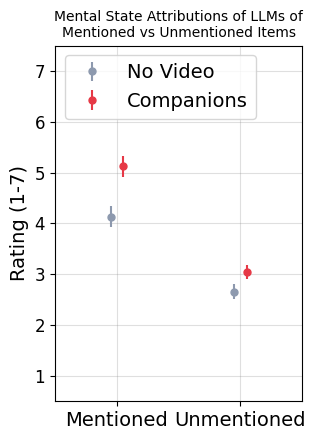

In [32]:
condition = "mentioned_analysis"
orientation = "vertical"
temp_conditions = ["NoVideo", "Companions"]
label_conditions = ["No Video", "Companions"]
mentioned_R_results_save_dir = os.path.join(analysis_dir, 'mental_capacities','body-heart-mind', 'mentioned_analysis', 'R', 'results')
mentioned_fig_save_dir = os.path.join(fig_save_dir, 'mentioned_unmentioned')
utils.ensure_dir(mentioned_fig_save_dir)

save = True

semantic_groupings_path = os.path.join(PATH_TO_ROOT, 'data', 'files', 'mentioned_groupings.json')
semantic_R_results_path = os.path.join(mentioned_R_results_save_dir, 'results.txt')

semantic_groupings = utils.read_file(semantic_groupings_path)
groups = list(semantic_groupings[condition].keys())

if not os.path.exists(semantic_R_results_path):
    raise ValueError("Path to R results file {} does not exist".format(semantic_R_results_path))

# Extract and format data to get means and 95% CI's
emmeans_graph_data, emmeans_df = analysis.read_emmeans_marginalized_result(
    results_path=semantic_R_results_path,
    grouping_source="mentioned",
    conditions=conditions,
    marginalized_var='group',
    marginalized_var_values=groups,
    save_dir=mentioned_fig_save_dir if save else None,
    overwrite=True
)
pivot_df = analysis._format_and_pivot_emmeans_df(
    emmeans_df=emmeans_df,
    target_column='group'
)
means = pivot_df[["mean-{}".format(condition) for condition in temp_conditions]].to_numpy().T
errors = pivot_df[["ci_error-{}".format(condition) for condition in temp_conditions]].to_numpy().T
labels = label_conditions

# Parameters for figure formatting
font_size_dict = {
    'ylabel': 14,
    'legend': 14,
    'xticklabel': 14,
    'yticklabel': 12
}
title = 'Mental State Attributions of LLMs of\nMentioned vs Unmentioned Items'
xtick_labels = [label.capitalize() for label in pivot_df['group'].to_list()]
xlabel = None
ytick_labels = [i for i in range(1, 8)]
ylabel = 'Rating (1-7)'
fig_size = (3.25, 4.5)
xlim = (-0.5, 1.5)
ylim = [0.5, 7.5]

fig_save_path = os.path.join(
    mentioned_fig_save_dir,
    'mentioned.{}'.format(save_ext))

fig, ax = visualizations.pointplot(
    means=means,
    errors=errors,
    orientation=orientation,
    labels=labels,
    ytick_labels=ytick_labels,
    yticks=ytick_labels,
    xtick_labels=xtick_labels,
    xlabel=xlabel,
    ylabel=ylabel,
    ylim=ylim,
    xlim=xlim,
    title=title,
    legend_loc='upper left',
    fig_size=fig_size,
    color_idxs=[7, 4],
    marker_size=5,
    show_grid=True,
    save_path=fig_save_path if save else None,
    font_size_dict=font_size_dict,
    spacing_multiplier=0.1,
    show=True)


### Plot Human-likeness of, Trust in, Confidence in Using, and Overall Feelings Towards LLMs

Reported and shown in PNAS

Legend (left to right):
* Gray: No Video
* Dark blue: Machines
* Yellow: Tools
* Red: Companions

#### Save the Zoomed in Versions 

(Used in submission, but not as clear stand alone)

[0625_104554] Saving graph to ../analysis/figures/attitudes/humanness_pointplot_zoomed.pdf
[0625_104555] Saving graph to ../analysis/figures/attitudes/trust_pointplot_zoomed.pdf
[0625_104555] Saving graph to ../analysis/figures/attitudes/feeling_pointplot_zoomed.pdf
[0625_104555] Saving graph to ../analysis/figures/attitudes/se_use_pointplot_zoomed.pdf


<Figure size 640x480 with 0 Axes>

<Figure size 100x150 with 0 Axes>

<Figure size 100x150 with 0 Axes>

<Figure size 100x150 with 0 Axes>

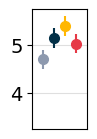

In [40]:
addit_dv_save_dir = os.path.join(fig_save_dir, 'attitudes')
utils.ensure_dir(addit_dv_save_dir)

dv_plot_type = 'pointplot'
legend_labels = ['No Video', 'Machines', 'Tools', 'Companions']
letter_labels = False
show_yticks = True
ymax = 7
zoom_y = True
save = True
font_size_dict = {
    'xlabel': 14,
    'ylabel': 16,
    'legend': 16,
    'title': 16,
    'suptitle': 18,
    'xticklabel': 14,
    'yticklabel': 14
}
buffer = 0.75

dv_labels = {
    'humanness': 'Human-likeness of LLMs', #\n(To what extent\ndo you believe LLMs\nare human-like?)',
    'trust': 'Trust in LLMs', #\n(I trust\nthe results\nfrom LLMs)',
    'feeling': 'Feelings towards LLMs', #\n(Overall, how\ndo you feel\nabout LLMs?)',
    # 'confidence': 'Confidence\nof Responses',
    # 'se_how': 'Conf. in Programming LLMs', #\n(I’m confident\nin my ability\nto learn simple\nprogramming of LLMs\nif I were provided\nthe necessary training)',
    'se_use': 'Conf. in Using LLMs' #\n(I’m confident in\nmy ability to get\nLLMs to do what\nI want them to do.)'
}

if zoom_y:
    ytickss = {
        'humanness': [2, 3],
        'trust': [4, 5],
        'feeling': [4, 5],
        'se_how': [5, 6],
        'se_use': [4, 5]
    }

addit_dvs = dv_labels.keys()

for idx, addit_dv in enumerate(addit_dvs):
    results_path = os.path.join(attitudes_R_results_save_dir, '{}_results.txt'.format(addit_dv))

    graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=results_path,
        grouping_source=addit_dv
    )

    if zoom_y:
        yticks = ytickss[addit_dv]
        ylim = [yticks[0] - buffer, yticks[-1] + buffer]
    else:
        yticks = [i for i in range(1, ymax + 1)]
        ylim = [0.25, ymax + 0.75]

    dv_means = list(np.array(graph_data['means']).squeeze())
    dv_errors = list(np.array(graph_data['errors']).squeeze())
    fig, ax = visualizations.pointplot(
        means=np.array([dv_means]).T,
        errors=np.array([dv_errors]).T,
        color_idxs=condition_color_idxs,
        labels=legend_labels,
        show_legend=False,
        orientation='vertical',
        xtick_labels=[],
        xlim=[-0.5, 0.5],
        yticks=yticks if show_yticks else None,
        ytick_labels=yticks if show_yticks else None,
        ylim=ylim,
        show_grid=True,
        marker_size=7,
        spacing_multiplier=0.2,
        fig_size=(1, 1.5),
        show=False,
        font_size_dict=font_size_dict,
    )
    ax.xaxis.set_label_position('top')

    plt.subplots_adjust(left=0.35, right=0.9)
    save_path = os.path.join(addit_dv_save_dir, '{}_pointplot_zoomed.{}'.format(addit_dv, save_ext))
    if save:
        utils.informal_log("Saving graph to {}".format(save_path))
        fig.savefig(save_path)
    else:
        print("Not saving, but would have saved to {}".format(addit_dv_save_dir))
    fig.show()


### Save Non-Zoomed in Version with Y-axis labels

[0625_105137] Saving graph to ../analysis/figures/attitudes/humanness_pointplot_fully.pdf
[0625_105137] Saving graph to ../analysis/figures/attitudes/trust_pointplot_fully.pdf
[0625_105137] Saving graph to ../analysis/figures/attitudes/feeling_pointplot_fully.pdf
[0625_105137] Saving graph to ../analysis/figures/attitudes/se_use_pointplot_fully.pdf


<Figure size 640x480 with 0 Axes>

<Figure size 125x350 with 0 Axes>

<Figure size 125x350 with 0 Axes>

<Figure size 125x350 with 0 Axes>

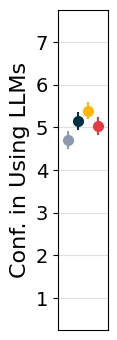

In [47]:
dv_plot_type = 'pointplot'
legend_labels = ['No Video', 'Machines', 'Tools', 'Companions']
letter_labels = False
show_yticks = True
ymax = 7
save = True
font_size_dict = {
    'xlabel': 14,
    'ylabel': 16,
    'legend': 16,
    'title': 16,
    'suptitle': 18,
    'xticklabel': 14,
    'yticklabel': 14
}
buffer = 0.75

dv_labels = {
    'humanness': 'Human-likeness of LLMs', #\n(To what extent\ndo you believe LLMs\nare human-like?)',
    'trust': 'Trust in LLMs', #\n(I trust\nthe results\nfrom LLMs)',
    'feeling': 'Feelings towards LLMs', #\n(Overall, how\ndo you feel\nabout LLMs?)',
    # 'confidence': 'Confidence\nof Responses',
    # 'se_how': 'Conf. in Programming LLMs', #\n(I’m confident\nin my ability\nto learn simple\nprogramming of LLMs\nif I were provided\nthe necessary training)',
    'se_use': 'Conf. in Using LLMs' #\n(I’m confident in\nmy ability to get\nLLMs to do what\nI want them to do.)'
}
full_questions = {
    'humanness': 'To what extent\ndo you believe LLMs\nare human-like?',
    'trust': 'I trust the results\nfrom LLMs.',
    'feeling': 'Overall, how do\nyou feel about\nLLMs?',
    # 'se_how': 'I’m confident in\nmy ability to learn\nsimple programming\nof LLMs if I\nwere provided the\nnecessary training',
    'se_use': 'I’m confident in my\nability to get LLMs to do\nwhat I want them to do.'
}

addit_dvs = dv_labels.keys()

for idx, addit_dv in enumerate(addit_dvs):
    results_path = os.path.join(attitudes_R_results_save_dir, '{}_results.txt'.format(addit_dv))

    graph_data, emmeans_df = analysis.read_emmeans_single_variable(
        results_path=results_path,
        grouping_source=addit_dv
    )

    ylim = [0.25, ymax + 0.75]
    yticks = [i for i in range(1, 8)]

    dv_means = list(np.array(graph_data['means']).squeeze())
    dv_errors = list(np.array(graph_data['errors']).squeeze())

    fig, ax = visualizations.pointplot(
        means=np.array([dv_means]).T,
        errors=np.array([dv_errors]).T,
        color_idxs=condition_color_idxs,
        labels=legend_labels,
        show_legend=False,
        orientation='vertical',
        xtick_labels=[],
        xlim=[-0.5, 0.5],
        yticks=yticks if show_yticks else None,
        ytick_labels=yticks if show_yticks else None,
        ylim=ylim,
        ylabel=dv_labels[addit_dv],
        show_grid=True,
        marker_size=7,
        spacing_multiplier=0.2,
        fig_size=(1.25, 3.5),
        show=False,
        font_size_dict=font_size_dict,
    )
    ax.xaxis.set_label_position('top')

    plt.subplots_adjust(left=0.5, right=0.9)
    save_path = os.path.join(addit_dv_save_dir, '{}_pointplot_fully.{}'.format(addit_dv, save_ext))
    if save:
        utils.informal_log("Saving graph to {}".format(save_path))
        fig.savefig(save_path)
    else:
        print("Not saving, but would have saved to {}".format(addit_dv_save_dir))
    fig.show()

